In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.utils import resample
import joblib



In [ ]:
# Load the final dataset
df = pd.read_csv("final_dataset_for_training.csv")

In [21]:
df

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Adjustment,Premium_Amount,...,Marital_Status_Single,Marital_Status_Widowed,Policy_Type_Full Coverage,Policy_Type_Liability-Only,Source_of_Lead_Agent,Source_of_Lead_Online,Source_of_Lead_Referral,Region_Rural,Region_Suburban,Region_Urban
0,47,0,86,1,50,0,0,0,0,2286,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,37,0,86,1,50,0,0,0,0,2336,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,49,0,86,1,50,1,0,50,0,2386,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,62,1,86,2,0,1,0,50,0,2336,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,36,0,0,2,0,2,0,100,0,2350,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,0,1,50,0,0,0,0,2250,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,18,0,86,1,50,0,1,0,0,2436,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9997,29,0,86,0,100,0,0,0,0,2486,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,47,0,0,0,100,0,1,0,-200,2150,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
X = df.drop(columns="Conversion_Status")
y = df["Conversion_Status"]

In [23]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=17)
print("X_train:", X_train.shape)
# print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

X_train: (6000, 34)
X_test: (2000, 34)


In [25]:
len(y_train[y_train == 0])

2572

In [26]:
len(y_train[y_train == 1])

3428

In [27]:
# Apply SMOTE for balancing the dataset
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Applying Random Forest

In [28]:
# Define the tuned Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=5,   # Increased number of trees
    max_depth=3,     # No limit on depth
)

In [33]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [34]:
# Save the trained model
model_path = "random_forest_model.pkl"
joblib.dump(rf_model, model_path)
print(f"Model saved as {model_path}")


Model saved as random_forest_model.pkl


In [35]:
# Predictions
y_pred = rf_model.predict(X_val)

Random Forest Accuracy: 0.9695

Confusion Matrix:
 [[ 793   26]
 [  35 1146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       819
           1       0.98      0.97      0.97      1181

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Score: 0.9695


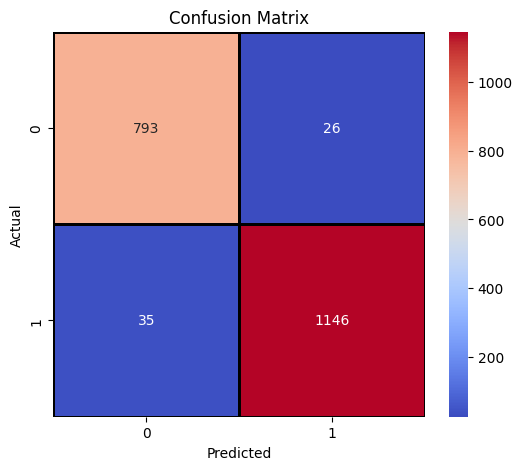

In [36]:
# Evaluation
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)
score = rf_model.score(X_val, y_val)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("\nScore:", score)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor='black')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Perform statistical tests to validate feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]


C:\Users\User\AppData\Local\Temp\ipykernel_2264\1078913073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")


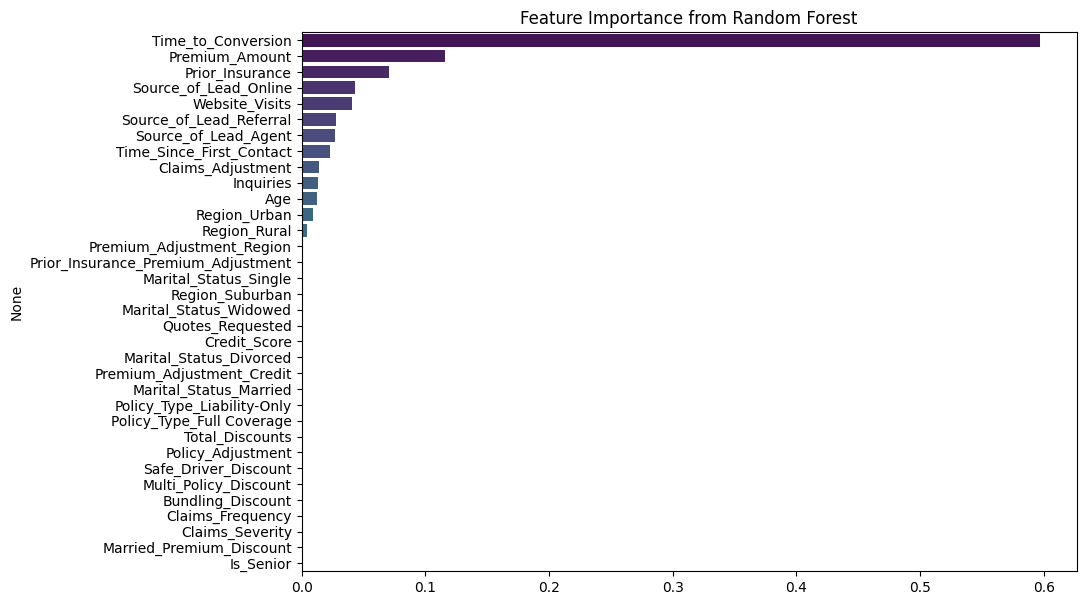

In [15]:
# Display feature importance
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()


In [16]:
 #Conduct statistical tests (t-tests) for top 5 features
top_features = feature_names[sorted_indices][:5]
for feature in top_features:
    group_0 = df[df["Conversion_Status"] == 0][feature]
    group_1 = df[df["Conversion_Status"] == 1][feature]
    t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
    print(f"T-test for {feature}: t-stat={t_stat:.3f}, p-value={p_value:.5f}")

    if p_value < 0.05:
        print(f"\t{feature} is statistically significant!")
    else:
        print(f"\t{feature} is NOT statistically significant.")


T-test for Time_to_Conversion: t-stat=1741.986, p-value=0.00000
	Time_to_Conversion is statistically significant!
T-test for Premium_Amount: t-stat=7.975, p-value=0.00000
	Premium_Amount is statistically significant!
T-test for Prior_Insurance: t-stat=-0.563, p-value=0.57340
	Prior_Insurance is NOT statistically significant.
T-test for Source_of_Lead_Online: t-stat=-1.472, p-value=0.14100
	Source_of_Lead_Online is NOT statistically significant.
T-test for Website_Visits: t-stat=-2.545, p-value=0.01096
	Website_Visits is statistically significant!


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
# Load the trained model
model = joblib.load("random_forest_model.pkl")

In [18]:
# Function to make predictions on new input
def predict_conversion_status(input_data):
    model = joblib.load("random_forest_model.pkl")
    input_df = pd.DataFrame([input_data], columns=[
        "Age", "Is_Senior", "Married_Premium_Discount", "Prior_Insurance", 
        "Prior_Insurance_Premium_Adjustment", "Claims_Frequency", "Claims_Severity", 
        "Claims_Adjustment", "Policy_Adjustment", "Premium_Amount", "Safe_Driver_Discount", 
        "Multi_Policy_Discount", "Bundling_Discount", "Total_Discounts", "Time_Since_First_Contact", 
        "Website_Visits", "Inquiries", "Quotes_Requested", "Time_to_Conversion", "Credit_Score", 
        "Premium_Adjustment_Credit", "Premium_Adjustment_Region", "Marital_Status_Divorced", 
        "Marital_Status_Married", "Marital_Status_Single", "Marital_Status_Widowed", 
        "Policy_Type_Full Coverage", "Policy_Type_Liability-Only", "Source_of_Lead_Agent", 
        "Source_of_Lead_Online", "Source_of_Lead_Referral", "Region_Rural", "Region_Suburban", "Region_Urban"
    ])
    prediction_proba = model.predict_proba(input_df)[0]
    prediction = model.predict(input_df)[0]
    return prediction, prediction_proba

# Example inputs
example_input_converted = {
    "Age": 30, "Is_Senior": 0, "Married_Premium_Discount": 50, "Prior_Insurance": 1,
    "Prior_Insurance_Premium_Adjustment": 40, "Claims_Frequency": 0, "Claims_Severity": 0,
    "Claims_Adjustment": 0, "Policy_Adjustment": 0, "Premium_Amount": 2500, "Safe_Driver_Discount": 1,
    "Multi_Policy_Discount": 1, "Bundling_Discount": 1, "Total_Discounts": 15, "Time_Since_First_Contact": 20,
    "Website_Visits": 3, "Inquiries": 1, "Quotes_Requested": 4, "Time_to_Conversion": 10, "Credit_Score": 750,
    "Premium_Adjustment_Credit": 30, "Premium_Adjustment_Region": 1, "Marital_Status_Divorced": 0,
    "Marital_Status_Married": 1, "Marital_Status_Single": 0, "Marital_Status_Widowed": 0,
    "Policy_Type_Full Coverage": 1, "Policy_Type_Liability-Only": 0, "Source_of_Lead_Agent": 1,
    "Source_of_Lead_Online": 0, "Source_of_Lead_Referral": 0, "Region_Rural": 0,
    "Region_Suburban": 1, "Region_Urban": 0
}

example_input_not_converted = {
    "Age": 55, "Is_Senior": 1, "Married_Premium_Discount": 5, "Prior_Insurance": 0,
    "Prior_Insurance_Premium_Adjustment": 10, "Claims_Frequency": 3, "Claims_Severity": 4,
    "Claims_Adjustment": 2, "Policy_Adjustment": 2, "Premium_Amount": 500, "Safe_Driver_Discount": 0,
    "Multi_Policy_Discount": 0, "Bundling_Discount": 0, "Total_Discounts": 2, "Time_Since_First_Contact": 90,
    "Website_Visits": 0, "Inquiries": 0, "Quotes_Requested": 1, "Time_to_Conversion": 100, "Credit_Score": 500,
    "Premium_Adjustment_Credit": 5, "Premium_Adjustment_Region": 0, "Marital_Status_Divorced": 1,
    "Marital_Status_Married": 0, "Marital_Status_Single": 0, "Marital_Status_Widowed": 0,
    "Policy_Type_Full Coverage": 0, "Policy_Type_Liability-Only": 1, "Source_of_Lead_Agent": 0,
    "Source_of_Lead_Online": 1, "Source_of_Lead_Referral": 0, "Region_Rural": 1,
    "Region_Suburban": 0, "Region_Urban": 0
}

# Test both scenarios
for i, (label, input_data) in enumerate([
    ("Converted", example_input_converted), 
    ("Not Converted", example_input_not_converted)
]):
    prediction, proba = predict_conversion_status(input_data)
    print(f"\nScenario {i+1} ({label} Expected):")
    print(f"🔹 Not Converted (0) Probability: {proba[0]:.4f}")
    print(f"🔹 Converted (1) Probability: {proba[1]:.4f}")
    print(f"Prediction: {'Converted' if prediction == 1 else 'Not Converted'}")



Scenario 1 (Converted Expected):
🔹 Not Converted (0) Probability: 0.2247
🔹 Converted (1) Probability: 0.7753
Prediction: Converted

Scenario 2 (Not Converted Expected):
🔹 Not Converted (0) Probability: 0.6692
🔹 Converted (1) Probability: 0.3308
Prediction: Not Converted
